In [1]:
# Because we discussed predicting circles I wanted to try it...
# also works good :) exciting... ._.

In [1]:
import os
import numpy as np
import pandas as pd
from trackml.dataset import load_event
from trackml.randomize import shuffle_hits
from trackml.score import score_event
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
from hough import *
from conformal_map import *
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
%matplotlib inline

Using TensorFlow backend.


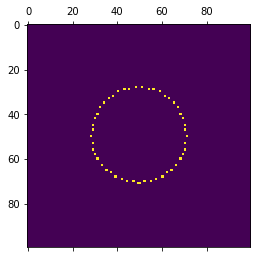

[0.42178068906732535]


In [2]:
import random
import math
train_X = []
train_Y = []
dims = 100
k = dims // 2
N = 8000
for i in range(N):
    r = random.uniform(0, 1)
    train_Y.append([r])
    image = np.zeros((dims, dims))
    for theta in np.linspace(0, 2 * math.pi):
        x = (r * math.cos(theta) * k + k)
        y = (r * math.sin(theta) * k + k)
#        print(x, y)
        image[int(x), int(y)] = 1
    train_X.append(image)

plt.matshow(train_X[6])
plt.show()
print(train_Y[6])
train_X = np.reshape(train_X, (N, dims, dims, 1))
train_Y = np.reshape(train_Y, (N, 1))

In [3]:
def build_model():
  model = keras.Sequential([
    layers.Conv2D(8, (3, 3), activation="relu", input_shape=(dims, dims, 1)),
    #layers.Conv2D(8, (3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    #layers.Conv2D(16, (3, 3), activation="relu"),
    layers.Conv2D(16, (3, 3), activation="relu"),
    layers.Flatten(),
    layers.Dense(1)
  ])

  #optimizer = keras.optimizers.RMSprop(learning_rate=0.00001) #0.00001 works good
  model.compile(loss='mse', optimizer='adam')
  return model

In [4]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 16)        1168      
_________________________________________________________________
flatten_1 (Flatten)          (None, 35344)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 35345     
Total params: 36,593
Trainable params: 36,593
Non-trainable params: 0
_________________________________________________________________


In [5]:
EPOCHS = 1
print(train_X.shape)
print(train_Y.shape)
history = model.fit(train_X, train_Y, validation_split=0.1, epochs=EPOCHS)

(8000, 100, 100, 1)
(8000, 1)
Train on 7200 samples, validate on 800 samples
Epoch 1/1
7200/7200 [==============================] - 9s 1ms/step - loss: 0.0051 - val_loss: 3.2060e-05


In [6]:
r = random.uniform(0, 1)
image = np.zeros((dims, dims))
for theta in np.linspace(0, 2 * math.pi):
    x = (r * math.cos(theta) * k + k)
    y = (r * math.sin(theta) * k + k)
    image[int(x), int(y)] = 1
print("Real radius: ", r)
predicted_params = model.predict(np.array([np.reshape(image, (dims, dims, 1))]))

Real radius:  0.3190338953943316


## real circle

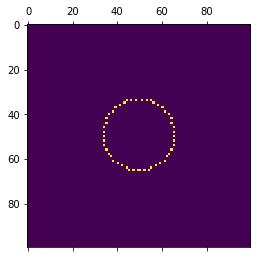

In [7]:
plt.matshow(image)
plt.show()

## predicted circle

Predicted radius 0.3173436


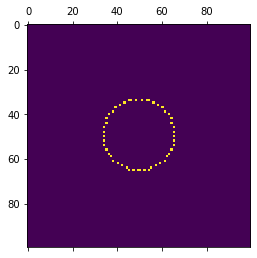

In [8]:
predicted_image = np.zeros((dims, dims))
r = predicted_params[0][0]
print("Predicted radius", r)
for theta in np.linspace(0, 2 * math.pi):
    x = (r * math.cos(theta) * k + k)
    y = (r * math.sin(theta) * k + k)
    predicted_image[int(x), int(y)] = 1
plt.matshow(predicted_image)
plt.show()